In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df だけだとわかりにくいからphenotypeぐらい変数に付けても良いと思う by 松岡

df = pd.read_csv('phenotype.hpoa', header=4, sep='\t', engine='python')

# 列名#DatabaseIDの#をとる
df = df.rename(columns={'#DatabaseID': 'DatabaseID'})

#DatabaseID が OMIM で始まるものに絞る
df = df[df['DatabaseID'].str.contains('OMIM')]
df.head(3)

,DatabaseID,DiseaseName,Qualifier,HPO_ID,Reference,Evidence,Onset,Frequency,Sex,Modifier,Aspect,Biocuration
0,OMIM:618850,Hypervalinemia or hyperleucine-isoleucinemia,NaN,HP:0010913,PMID:25653144,PCS,NaN,1月1日,NaN,NaN,P,HPO:probinson[2020-07-23];HPO:probinson[2020-0...
1,OMIM:618850,Hypervalinemia or hyperleucine-isoleucinemia,NaN,HP:0000007,PMID:25653144,PCS,NaN,NaN,NaN,NaN,I,HPO:probinson[2020-07-23];HPO:probinson[2020-0...
2,OMIM:618850,Hypervalinemia or hyperleucine-isoleucinemia,NaN,HP:0002922,PMID:25653144,PCS,NaN,1月1日,NaN,NaN,P,HPO:probinson[2020-07-23];HPO:probinson[2020-0...


In [3]:
df = df[['DatabaseID', 'HPO_ID']]
df.head(3)

,DatabaseID,HPO_ID
0,OMIM:618850,HP:0010913
1,OMIM:618850,HP:0000007
2,OMIM:618850,HP:0002922


In [3]:
#phenotype.hpoa ファイルを単純な集計
#・何個の病気があるのか
#・一個の病気あたり何個くらいのHPOタームがついているのか

In [4]:
# 何個の病気があるのか'
#-------------------------------------

# 「#DatabaseID：OMIMで開始」のユニークな個数　7860個
# クオーテーションは統一しましょう　by pep " と'のどちらかです。
# 集計関数は、pandasだとpivot_table/cross_tab/groub_byがあるけども実はgroup_byが効率が良いのです。
# https://ramiro.org/notebook/pandas-crosstab-groupby-pivot/ 参考ページ
# 書くとしたらこんな感じです
# df_a = df[['DatabaseID','HPO_ID']].groupby(['DatabaseID']).count()

df_a = df.pivot_table(values="HPO_ID", index='DatabaseID',aggfunc=['count'])
df_a.columns = ['HPO_ID']

In [5]:
df_a.head()

,HPO_ID
DatabaseID,
OMIM:100050,42
OMIM:100070,4
OMIM:100100,19
OMIM:100200,3
OMIM:100300,39


In [9]:
#・一個の病気あたり何個くらいのHPOタームがついているのか
#------------

df_a.describe()
# 一つのDatabaseIDにつくHPO_IDの数の平均14個

,HPO_ID
count,7860.000000
mean,14.098092
std,12.944700
min,1.000000
25%,5.000000
50%,10.000000
75%,19.000000
max,129.000000


In [15]:
#'HPO_ID'のユニークな要素→7637個
# 集計関数は、pandasだとpivot_table/cross_tab/groub_byがあるけども実はgroup_byが効率が良いのです。
# https://ramiro.org/notebook/pandas-crosstab-groupby-pivot/ 参考ページ
# 書くとしたらこんな感じです
# df_b = df[['DatabaseID','HPO_ID']].groupby(['HPO_ID']).count()

#df_b = df.pivot_table(values="DatabaseID", index='HPO_ID',aggfunc=['count'])
df_b = df[['DatabaseID','HPO_ID']].groupby(['HPO_ID']).count()
df_b.columns = ['DatabaseID']
df_b

,DatabaseID
HPO_ID,
HP:0000002,7
HP:0000003,16
HP:0000006,3348
HP:0000007,3818
HP:0000008,1
...,...
HP:0500198,1
HP:0500253,1
HP:0500262,1


In [16]:
print('df_a:　', df_a.nunique())
print('df_b:　', df_b.nunique())

df_a:　 HPO_ID    91
dtype: int64
df_b:　 DatabaseID    230
dtype: int64


In [17]:
array_a = np.array(df_a)
array_b = np.array(df_b)

hist_a, bins_a = np.histogram(array_a)
hist_b, bins_b = np.histogram(array_b)

print('hist_a: ', hist_a, '\nbins_a:', bins_a, '\nbins_a数:', len(bins_a))
print()
print('hist_b: ', hist_b, '\nbins_b:', bins_b, '\nbins_b数:', len(bins_b))

hist_a:  [4840 1892  724  261   82   40   12    6    2    1] 
bins_a: [  1.   13.8  26.6  39.4  52.2  65.   77.8  90.6 103.4 116.2 129. ] 
bins_a数: 11

hist_b:  [7615   14    3    3    0    0    0    0    1    1] 
bins_b: [1.0000e+00 3.8270e+02 7.6440e+02 1.1461e+03 1.5278e+03 1.9095e+03
 2.2912e+03 2.6729e+03 3.0546e+03 3.4363e+03 3.8180e+03] 
bins_b数: 11


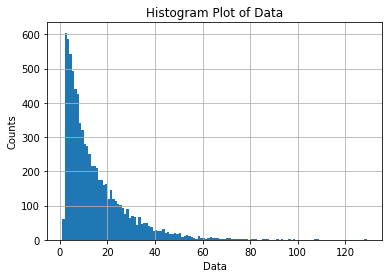

In [18]:
binwidth=1
# bins=np.array(min(疾患あたりのHPO_ID数), max(疾患あたりのHPO_ID数) - min (疾患あたりのHPO_ID数)+step, step )
plt.hist(array_a, bins=np.arange(min(array_a), max(array_a) + binwidth, binwidth))
plt.xlabel('Data')
plt.ylabel('Counts')
plt.title('Histogram Plot of Data')
plt.grid(True)
plt.show()

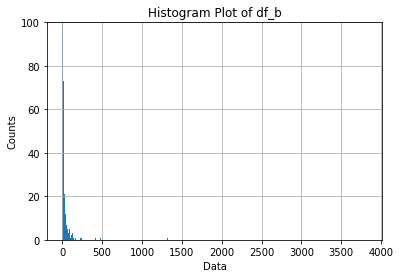

In [19]:
#Y軸上限100
binwidth=1
plt.hist(array_b, bins=np.arange(min(array_b), max(array_b) + binwidth, binwidth))
plt.xlabel('Data')
plt.ylabel('Counts')
plt.ylim(0,100)
plt.title('Histogram Plot of df_b')
plt.grid(True)
plt.show()

In [11]:
# ①df_aから一個のHPO_IDしかつけられていない疾患を抽出する。
# ②そのHPO_IDたちをリストにする
# ③df_bからそのリストを抽出して疾患の数を数える

In [12]:
df_a = df.pivot_table(values="HPO_ID", index='DatabaseID',aggfunc=['count'])
df_a.columns = ['HPO_ID']
df_a

,HPO_ID
DatabaseID,
OMIM:100050,42
OMIM:100070,4
OMIM:100100,19
OMIM:100200,3
OMIM:100300,39
...,...
OMIM:618985,12
OMIM:618986,29
OMIM:618987,9


In [13]:
df_b = df.pivot_table(values="DatabaseID", index='HPO_ID',aggfunc=['count'])
df_b.columns = ['DatabaseID']
df_b

,DatabaseID
HPO_ID,
HP:0000002,7
HP:0000003,16
HP:0000006,3348
HP:0000007,3818
HP:0000008,1
...,...
HP:0500198,1
HP:0500253,1
HP:0500262,1


In [20]:
# ①df_aから一個のHPO_IDしかつけられていない疾患を抽出する。⇒ df_a_1
# ---------------------------------------------
df_a_1 = df_a[df_a["HPO_ID"]==1]
print(df_a_1.describe())

       HPO_ID
count    61.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0


In [21]:
df_a_1 # 一個のHPO_IDしかつけられていない疾患（DatabaseID ）がインデックスに。

,HPO_ID
DatabaseID,
OMIM:107700,1
OMIM:120050,1
OMIM:124100,1
OMIM:137245,1
OMIM:137763,1
...,...
OMIM:615236,1
OMIM:615619,1
OMIM:615992,1


In [24]:
# ②そのHPO_IDたちをリストにする
# ---------------------------------------------
# df_a_1にはHPO_IDの個数しかないため、dfからHPO_IDを取得する。
# df_a_1のインデックス'DatabaseID'をリストにし,
# dfの'DatabaseID列からこのリストにあるものを抽出する。
# 抽出分のHPO_IDを取得してリスト化。

# df_a_1のインデックス'DatabaseID'をリスト化

# df_a_1.index.values.tolist() 一度valuesを経由しなくてもdf_a_1.index.tolist()で良いはず
# 変数名でlistは駄目　なぜならpythonの標準関数にlistがあるため
# https://www.programiz.com/python-programming/methods/built-in/list

list = df_a_1.index.values.tolist()
print(list, len(list))

#  dfの'DatabaseID列からリストにあるものを抽出
# この使い方はGood!
A = df[df['DatabaseID'].isin(list)]
print('\n', A)

# 抽出分のHPO_IDを取得してリスト化　⇒ List
# A['HPO_ID'].values.tolist() 一度valuesを経由しなくてもA['HPO_ID'].tolist()で良いはず
List = A['HPO_ID'].values.tolist()
print('\n', List, len(List))

['OMIM:107700', 'OMIM:120050', 'OMIM:124100', 'OMIM:137245', 'OMIM:137763', 'OMIM:139630', 'OMIM:158280', 'OMIM:161550', 'OMIM:203340', 'OMIM:208158', 'OMIM:221995', 'OMIM:226810', 'OMIM:243185', 'OMIM:277990', 'OMIM:300082', 'OMIM:300218', 'OMIM:300262', 'OMIM:300709', 'OMIM:300909', 'OMIM:400004', 'OMIM:425500', 'OMIM:515000', 'OMIM:600263', 'OMIM:600457', 'OMIM:601941', 'OMIM:601942', 'OMIM:602197', 'OMIM:602484', 'OMIM:603855', 'OMIM:605027', 'OMIM:605462', 'OMIM:606963', 'OMIM:608175', 'OMIM:608355', 'OMIM:609256', 'OMIM:609257', 'OMIM:609258', 'OMIM:609259', 'OMIM:609887', 'OMIM:609993', 'OMIM:610187', 'OMIM:610441', 'OMIM:612244', 'OMIM:612278', 'OMIM:612520', 'OMIM:612877', 'OMIM:613100', 'OMIM:613244', 'OMIM:613252', 'OMIM:613286', 'OMIM:613342', 'OMIM:613347', 'OMIM:613757', 'OMIM:613825', 'OMIM:613949', 'OMIM:614128', 'OMIM:615236', 'OMIM:615619', 'OMIM:615992', 'OMIM:616806', 'OMIM:618429'] 61

          DatabaseID      HPO_ID
1036    OMIM:609259  HP:0000545
4828    OMIM:61

In [17]:
# ③df_bからそのリストを抽出して疾患の数を数える
pd.set_option('display.max_rows', None)
df_b.loc[List]

,DatabaseID
HPO_ID,
HP:0000545,229
HP:0002894,6
HP:0006716,6
HP:0001644,105
HP:0002804,93
HP:0100665,6
HP:0004947,4
HP:0002665,21
HP:0000707,53


In [ ]:
# 余談　HPの名前がhp.oboに入っているので一応取り出し方を簡単に

In [ ]:
# prontoをインストールしていなければ要実行
!pip install pronto

In [25]:
import pronto

In [26]:
ont = pronto.Ontology('hp.obo')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UnicodeWarning: unsound encoding, assuming ISO-8859-1 (73% confidence)
  """Entry point for launching an IPython kernel.


In [27]:
term_id_list =[]
term_id_name =[]

In [28]:
for term in ont.terms():
    #if term.is_leaf():
    term_id_list.append(term.id)
    term_id_name.append(term.name)


In [30]:
hp_name_df = pd.DataFrame({'HP_Name' : term_id_name,'HPO_ID' : term_id_list})

In [31]:
hp_name_df.head()

,HP_Name,HPO_ID
0,All,HP:0000001
1,Abnormality of body height,HP:0000002
2,Multicystic kidney dysplasia,HP:0000003
3,Mode of inheritance,HP:0000005
4,Autosomal dominant inheritance,HP:0000006
